In [3]:
import pandas as pd
import ast
import os
from pprint import pprint
import matplotlib.pyplot as plt
from auxiliar_func import *
from plot_func import *

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool

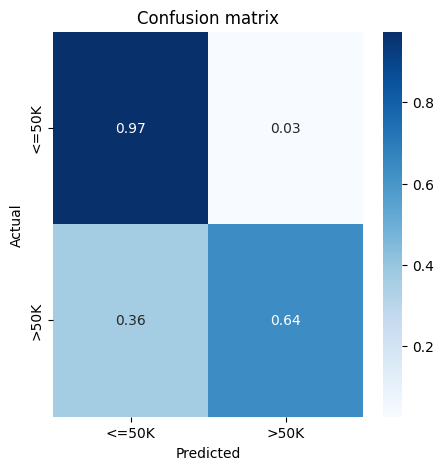

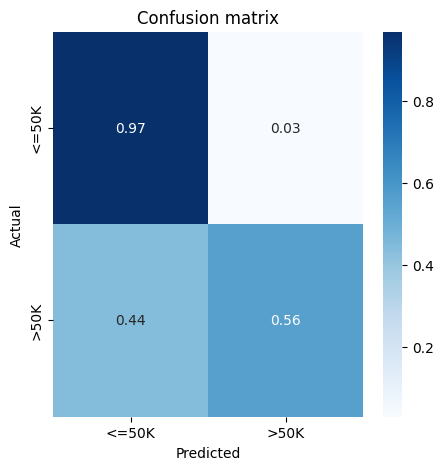

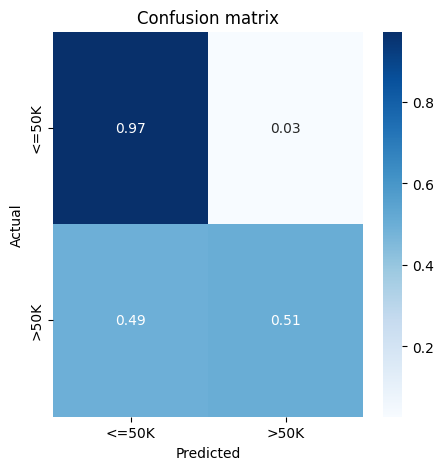

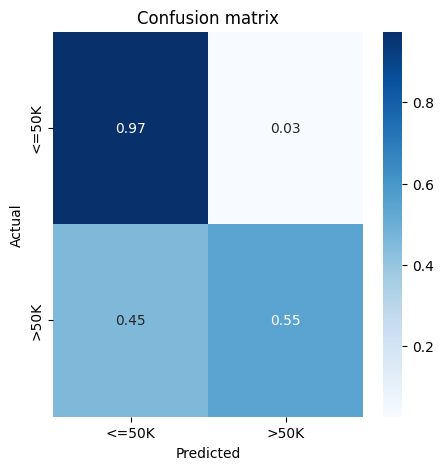

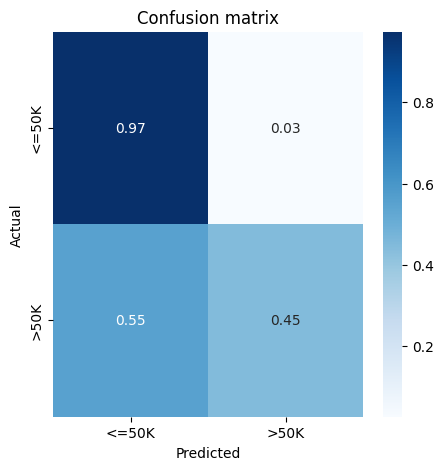

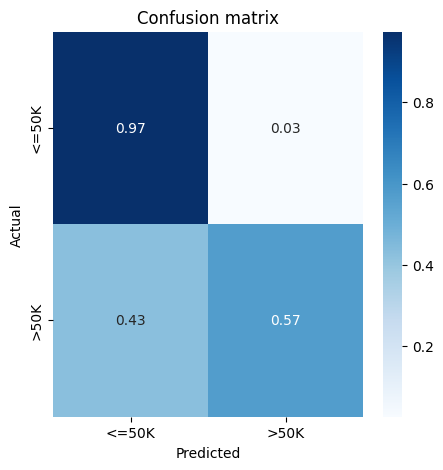

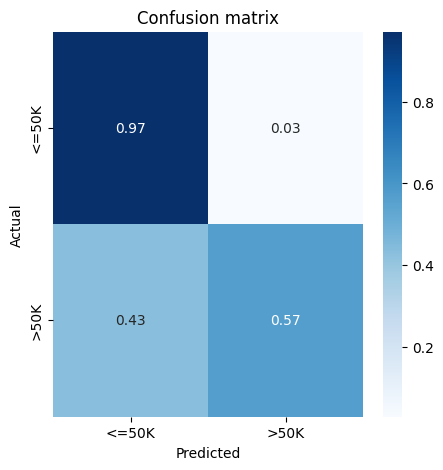

,accuracy,f1_macro,precision_macro,recall_macro
model,,,,
catboost,0.953410,0.798933,0.804458,0.793830
rf,0.946429,0.777568,0.772093,0.783591
logreg,0.943480,0.773913,0.759823,0.790401
svm,0.945814,0.773398,0.770054,0.777069
knn,0.943737,0.758017,0.762244,0.754322


In [4]:
models = {
    'knn': KNN,
    'svm': LinearSVC,
    'rf': RandomForestClassifier,
    'logreg': LogisticRegression,
    'catboost': CatBoostClassifier,
    'lda': LDA,
    'qda': QDA
}

df_tr = pd.read_csv('../train.csv')

TARGET_METRIC = 'f1_macro'
SEED = 42
CV_FOLDS = 20

results = pd.DataFrame(columns=['model', 'accuracy', 'f1_macro', 'precision_macro', 'recall_macro'], dtype=float)
results.set_index('model', inplace=True)


for file in os.listdir('./results'):
    if file.endswith('.csv') and file.startswith('results_'):
        res = read_results('./results/'+file)
        prep_par, model_par = get_best_params('./results/'+file)
        mod_name = file.split('_')[1][:-4]
        model = models[mod_name](**model_par)
        score, y_pred, y_true = cross_validation(model, df_tr, prep_par, cv=CV_FOLDS, random_state=SEED, return_predict=True)

        results.loc[mod_name] = pd.Series(score)
        
        plot_conf_matrix(y_true, y_pred, './figures/conf_matrix_'+mod_name+'.pdf', show=False)
        

results = results.sort_values(by=TARGET_METRIC, ascending=False)

In [7]:
results.to_csv('./results/cv20_results.csv')
results.head(10)

,accuracy,f1_macro,precision_macro,recall_macro
model,,,,
catboost,0.953410,0.798933,0.804458,0.793830
rf,0.946429,0.777568,0.772093,0.783591
logreg,0.943480,0.773913,0.759823,0.790401
svm,0.945814,0.773398,0.770054,0.777069
knn,0.943737,0.758017,0.762244,0.754322
lda,0.938067,0.757537,0.739842,0.779145
qda,0.927871,0.739943,0.710514,0.783325
